
<BR>
<CENTER>
<FONT SIZE = 4, COLOR="#2C32C3">
<BR><B>Northeastern University</B>
<BR><B><font size=4, color=black>Husky-3,</BR>
ALY6010 Prob Theory and Intro Stats</B>
 <BR> Motor Vehicle Collision Crash in New York(2017-2023)
<BR> Final Project — Milestone 1 
<BR> Aliha Ansari, Leena Doultani, Rohit Kosamkar, Sapna Chavan, Soumya Guliyan
<BR><font size=4, color=dark red> Date: 03.06.2024
</FONT>
</CENTER>


In [ ]:
### Importing important libraries
library(dplyr)
library(janitor)
library(ggplot2)
library(leaflet)
library(scales)
library(tidyr)
library(knitr)
library(kableExtra)
library(psych)


In [2]:
# Read the dataset
crash_df<- read.csv("Downloads/Motor_Vehicle_Collisions_-_Crashes.csv")

In [3]:
### EDA
colSums(is.na(crash_df))

CRASH.DATE                    CRASH.TIME 
                            0                             0 
                      BOROUGH                      ZIP.CODE 
                            0                        644352 
                     LATITUDE                     LONGITUDE 
                       233322                        233322 
                     LOCATION                ON.STREET.NAME 
                            0                             0 
            CROSS.STREET.NAME               OFF.STREET.NAME 
                            0                             0 
    NUMBER.OF.PERSONS.INJURED      NUMBER.OF.PERSONS.KILLED 
                           18                            31 
NUMBER.OF.PEDESTRIANS.INJURED  NUMBER.OF.PEDESTRIANS.KILLED 
                            0                             0 
    NUMBER.OF.CYCLIST.INJURED      NUMBER.OF.CYCLIST.KILLED 
                            0                             0 
   NUMBER.OF.MOTORIST.INJURED     NUMBER.OF.MOTORIST.KILLED 
                            0                             0 
CONTRIBUTING.FACTOR.VEHICLE.1 CONTRIBUTING.FACTOR.VEHICLE.2 
                            0                             0 
CONTRIBUTING.FACTOR.VEHICLE.3 CONTRIBUTING.FACTOR.VEHICLE.4 
                            0                             0 
CONTRIBUTING.FACTOR.VEHICLE.5                  COLLISION_ID 
                            0                             0 
          VEHICLE.TYPE.CODE.1           VEHICLE.TYPE.CODE.2 
                            1                            12 
          VEHICLE.TYPE.CODE.3           VEHICLE.TYPE.CODE.4 
                            1                             0 
          VEHICLE.TYPE.CODE.5 
                            0

### Data Cleaning 

In [4]:
# How many blanks are there in our dataset 
sapply(crash_df, function(x) sum(nchar(x) == 0))

max(crash_df$CRASH.DATE)
min(crash_df$CRASH.DATE)
str(crash_df)

CRASH.DATE                    CRASH.TIME 
                            0                             0 
                      BOROUGH                      ZIP.CODE 
                       644060                            NA 
                     LATITUDE                     LONGITUDE 
                           NA                            NA 
                     LOCATION                ON.STREET.NAME 
                       233322                        439061 
            CROSS.STREET.NAME               OFF.STREET.NAME 
                       781681                       1723381 
    NUMBER.OF.PERSONS.INJURED      NUMBER.OF.PERSONS.KILLED 
                           NA                            NA 
NUMBER.OF.PEDESTRIANS.INJURED  NUMBER.OF.PEDESTRIANS.KILLED 
                            0                             0 
    NUMBER.OF.CYCLIST.INJURED      NUMBER.OF.CYCLIST.KILLED 
                            0                             0 
   NUMBER.OF.MOTORIST.INJURED     NUMBER.OF.MOTORIST.KILLED 
                            0                             0 
CONTRIBUTING.FACTOR.VEHICLE.1 CONTRIBUTING.FACTOR.VEHICLE.2 
                         6764                        320441 
CONTRIBUTING.FACTOR.VEHICLE.3 CONTRIBUTING.FACTOR.VEHICLE.4 
                      1922275                       2036722 
CONTRIBUTING.FACTOR.VEHICLE.5                  COLLISION_ID 
                      2061045                             0 
          VEHICLE.TYPE.CODE.1           VEHICLE.TYPE.CODE.2 
                           NA                            NA 
          VEHICLE.TYPE.CODE.3           VEHICLE.TYPE.CODE.4 
                           NA                       2037875 
          VEHICLE.TYPE.CODE.5 
                      2061319

[1] "12/31/2023"

[1] "01/01/2013"

'data.frame':	2070069 obs. of  29 variables:
 $ CRASH.DATE                   : chr  "09/11/2021" "03/26/2022" "06/29/2022" "09/11/2021" ...
 $ CRASH.TIME                   : chr  "2:39" "11:45" "6:55" "9:35" ...
 $ BOROUGH                      : chr  "" "" "" "BROOKLYN" ...
 $ ZIP.CODE                     : int  NA NA NA 11208 11233 NA NA 10475 11207 10017 ...
 $ LATITUDE                     : num  NA NA NA 40.7 40.7 ...
 $ LONGITUDE                    : num  NA NA NA -73.9 -73.9 ...
 $ LOCATION                     : chr  "" "" "" "(40.667202, -73.8665)" ...
 $ ON.STREET.NAME               : chr  "WHITESTONE EXPRESSWAY" "QUEENSBORO BRIDGE UPPER" "THROGS NECK BRIDGE" "" ...
 $ CROSS.STREET.NAME            : chr  "20 AVENUE" "" "" "" ...
 $ OFF.STREET.NAME              : chr  "" "" "" "1211      LORING AVENUE" ...
 $ NUMBER.OF.PERSONS.INJURED    : int  2 1 0 0 0 0 0 2 0 0 ...
 $ NUMBER.OF.PERSONS.KILLED     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NUMBER.OF.PEDESTRIANS.INJURED: int  0 0 0 0 0 0

In [5]:
### Cleaning column names using janitor
crash_df <- clean_names(crash_df)
names(crash_df)

[1] "crash_date"                    "crash_time"                   
 [3] "borough"                       "zip_code"                     
 [5] "latitude"                      "longitude"                    
 [7] "location"                      "on_street_name"               
 [9] "cross_street_name"             "off_street_name"              
[11] "number_of_persons_injured"     "number_of_persons_killed"     
[13] "number_of_pedestrians_injured" "number_of_pedestrians_killed" 
[15] "number_of_cyclist_injured"     "number_of_cyclist_killed"     
[17] "number_of_motorist_injured"    "number_of_motorist_killed"    
[19] "contributing_factor_vehicle_1" "contributing_factor_vehicle_2"
[21] "contributing_factor_vehicle_3" "contributing_factor_vehicle_4"
[23] "contributing_factor_vehicle_5" "collision_id"                 
[25] "vehicle_type_code_1"           "vehicle_type_code_2"          
[27] "vehicle_type_code_3"           "vehicle_type_code_4"          
[29] "vehicle_type_code_5"

In [6]:
### converting Crash_date char to date data type
crash_df$crash_date <- as.Date(crash_df$crash_date, format = "%m/%d/%Y")

In [7]:
### Considering latest data (> 2017)
sub_crash_df <- crash_df %>% filter(crash_date >= "2017-01-01")

In [8]:
# Checking if there are any duplicate records 
sub_crash_df[duplicated(sub_crash_df), ]

Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,⋯,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
<date>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>


In [10]:
# checking for na
# str(sub_crash_df)
colSums(is.na(sub_crash_df))

sapply(sub_crash_df, function(x) sum(nchar(x) == 0))

crash_date                    crash_time 
                            0                             0 
                      borough                      zip_code 
                            0                        393070 
                     latitude                     longitude 
                        81212                         81212 
                     location                on_street_name 
                            0                             0 
            cross_street_name               off_street_name 
                            0                             0 
    number_of_persons_injured      number_of_persons_killed 
                           17                            30 
number_of_pedestrians_injured  number_of_pedestrians_killed 
                            0                             0 
    number_of_cyclist_injured      number_of_cyclist_killed 
                            0                             0 
   number_of_motorist_injured     number_of_motorist_killed 
                            0                             0 
contributing_factor_vehicle_1 contributing_factor_vehicle_2 
                            0                             0 
contributing_factor_vehicle_3 contributing_factor_vehicle_4 
                            0                             0 
contributing_factor_vehicle_5                  collision_id 
                            0                             0 
          vehicle_type_code_1           vehicle_type_code_2 
                            0                             8 
          vehicle_type_code_3           vehicle_type_code_4 
                            1                             0 
          vehicle_type_code_5 
                            0

crash_date                    crash_time 
                            0                             0 
                      borough                      zip_code 
                       392887                            NA 
                     latitude                     longitude 
                           NA                            NA 
                     location                on_street_name 
                        81212                        278326 
            cross_street_name               off_street_name 
                       576134                        835094 
    number_of_persons_injured      number_of_persons_killed 
                           NA                            NA 
number_of_pedestrians_injured  number_of_pedestrians_killed 
                            0                             0 
    number_of_cyclist_injured      number_of_cyclist_killed 
                            0                             0 
   number_of_motorist_injured     number_of_motorist_killed 
                            0                             0 
contributing_factor_vehicle_1 contributing_factor_vehicle_2 
                         4517                        201101 
contributing_factor_vehicle_3 contributing_factor_vehicle_4 
                      1026658                       1091781 
contributing_factor_vehicle_5                  collision_id 
                      1106411                             0 
          vehicle_type_code_1           vehicle_type_code_2 
                         9722                            NA 
          vehicle_type_code_3           vehicle_type_code_4 
                           NA                       1092733 
          vehicle_type_code_5 
                      1106624

In [11]:
### contributing_factor_vehicle_3, contributing_factor_vehicle_4, contributing_factor_vehicle_5, 
### vehicle_type_code_4, vehicle_type_code_5 contains blanks so we will drop those columns
### Location, on_street_name, cross_street_name, off_street_name dropping off from analysis
drop_cols <- c( "contributing_factor_vehicle_4", 
               "contributing_factor_vehicle_5", 
               "vehicle_type_code_4", 
               "vehicle_type_code_5",
               "location", 
               "on_street_name", 
               "cross_street_name", 
               "off_street_name")


In [ ]:
## Selecting important columns

sub_crash_df <- sub_crash_df %>% select(-drop_cols )


In [13]:
### Let's find out columns which contains NA values

colSums(is.na(sub_crash_df))

na_cols <- c(
  "number_of_persons_injured",
  "number_of_persons_killed",
  "vehicle_type_code_2",
  "vehicle_type_code_3"
)

crash_date                    crash_time 
                            0                             0 
                      borough                      zip_code 
                            0                        393070 
                     latitude                     longitude 
                        81212                         81212 
    number_of_persons_injured      number_of_persons_killed 
                           17                            30 
number_of_pedestrians_injured  number_of_pedestrians_killed 
                            0                             0 
    number_of_cyclist_injured      number_of_cyclist_killed 
                            0                             0 
   number_of_motorist_injured     number_of_motorist_killed 
                            0                             0 
contributing_factor_vehicle_1 contributing_factor_vehicle_2 
                            0                             0 
contributing_factor_vehicle_3                  collision_id 
                            0                             0 
          vehicle_type_code_1           vehicle_type_code_2 
                            0                             8 
          vehicle_type_code_3 
                            1

In [14]:
## Fill NA with 0 in selected columns
sub_crash_df[na_cols] <- lapply(sub_crash_df[na_cols], function(x) ifelse(is.na(x), 0, x))

In [15]:
### Fill blanks values
# Values in contributing_factor_vehicle

value_counts_factors <- table(sub_crash_df$contributing_factor_vehicle_1)
sort(value_counts_factors, decreasing = TRUE)

blnk_cols_vehicle <- c("contributing_factor_vehicle_1",
               "contributing_factor_vehicle_2",
               "contributing_factor_vehicle_3")

sub_crash_df[blnk_cols_vehicle] <- lapply(sub_crash_df[blnk_cols_vehicle], function(x) ifelse(nchar(x) == 0, "Unspecified", x))


                       Driver Inattention/Distraction 
                                               275115 
                                          Unspecified 
                                               257399 
                                Following Too Closely 
                                                92585 
                        Failure to Yield Right-of-Way 
                                                76899 
                       Passing or Lane Usage Improper 
                                                49336 
                                     Backing Unsafely 
                                                46120 
                                  Passing Too Closely 
                                                44263 
                                 Unsafe Lane Changing 
                                                33262 
                                      Other Vehicular 
                                                32106 
         

In [16]:
### Replace "Station Wagon/Sport Utility Vehicle" with "Sport Utility Vehicle" in 'vehicle_type' 

sub_crash_df$vehicle_type_code_1 <- gsub("Station Wagon/Sport Utility Vehicle", "Sport Utility Vehicle", sub_crash_df$vehicle_type_code_1)

### Feature Engineering 

In [17]:
# creating Month, Year column in data set to analyse monthly and Yearly collisions
sub_crash_df <- sub_crash_df %>%
  mutate(month = format(crash_date, "%m"))

sub_crash_df <- sub_crash_df %>%
  mutate(year = format(crash_date, "%Y"))

In [18]:
# Let's calculate total injuries & casualities for each record by adding sub columns 

sub_crash_df <- sub_crash_df %>%
  mutate(total_injury = number_of_persons_injured + 
           number_of_pedestrians_injured + 
           number_of_cyclist_injured + 
           number_of_motorist_injured )

sub_crash_df <- sub_crash_df %>%
  mutate(total_casualty = number_of_persons_killed + 
           number_of_pedestrians_killed + 
           number_of_cyclist_killed + 
           number_of_motorist_killed )

### Analysis

#### 1. What is the overall trend in the number of vehicle crashes over time?

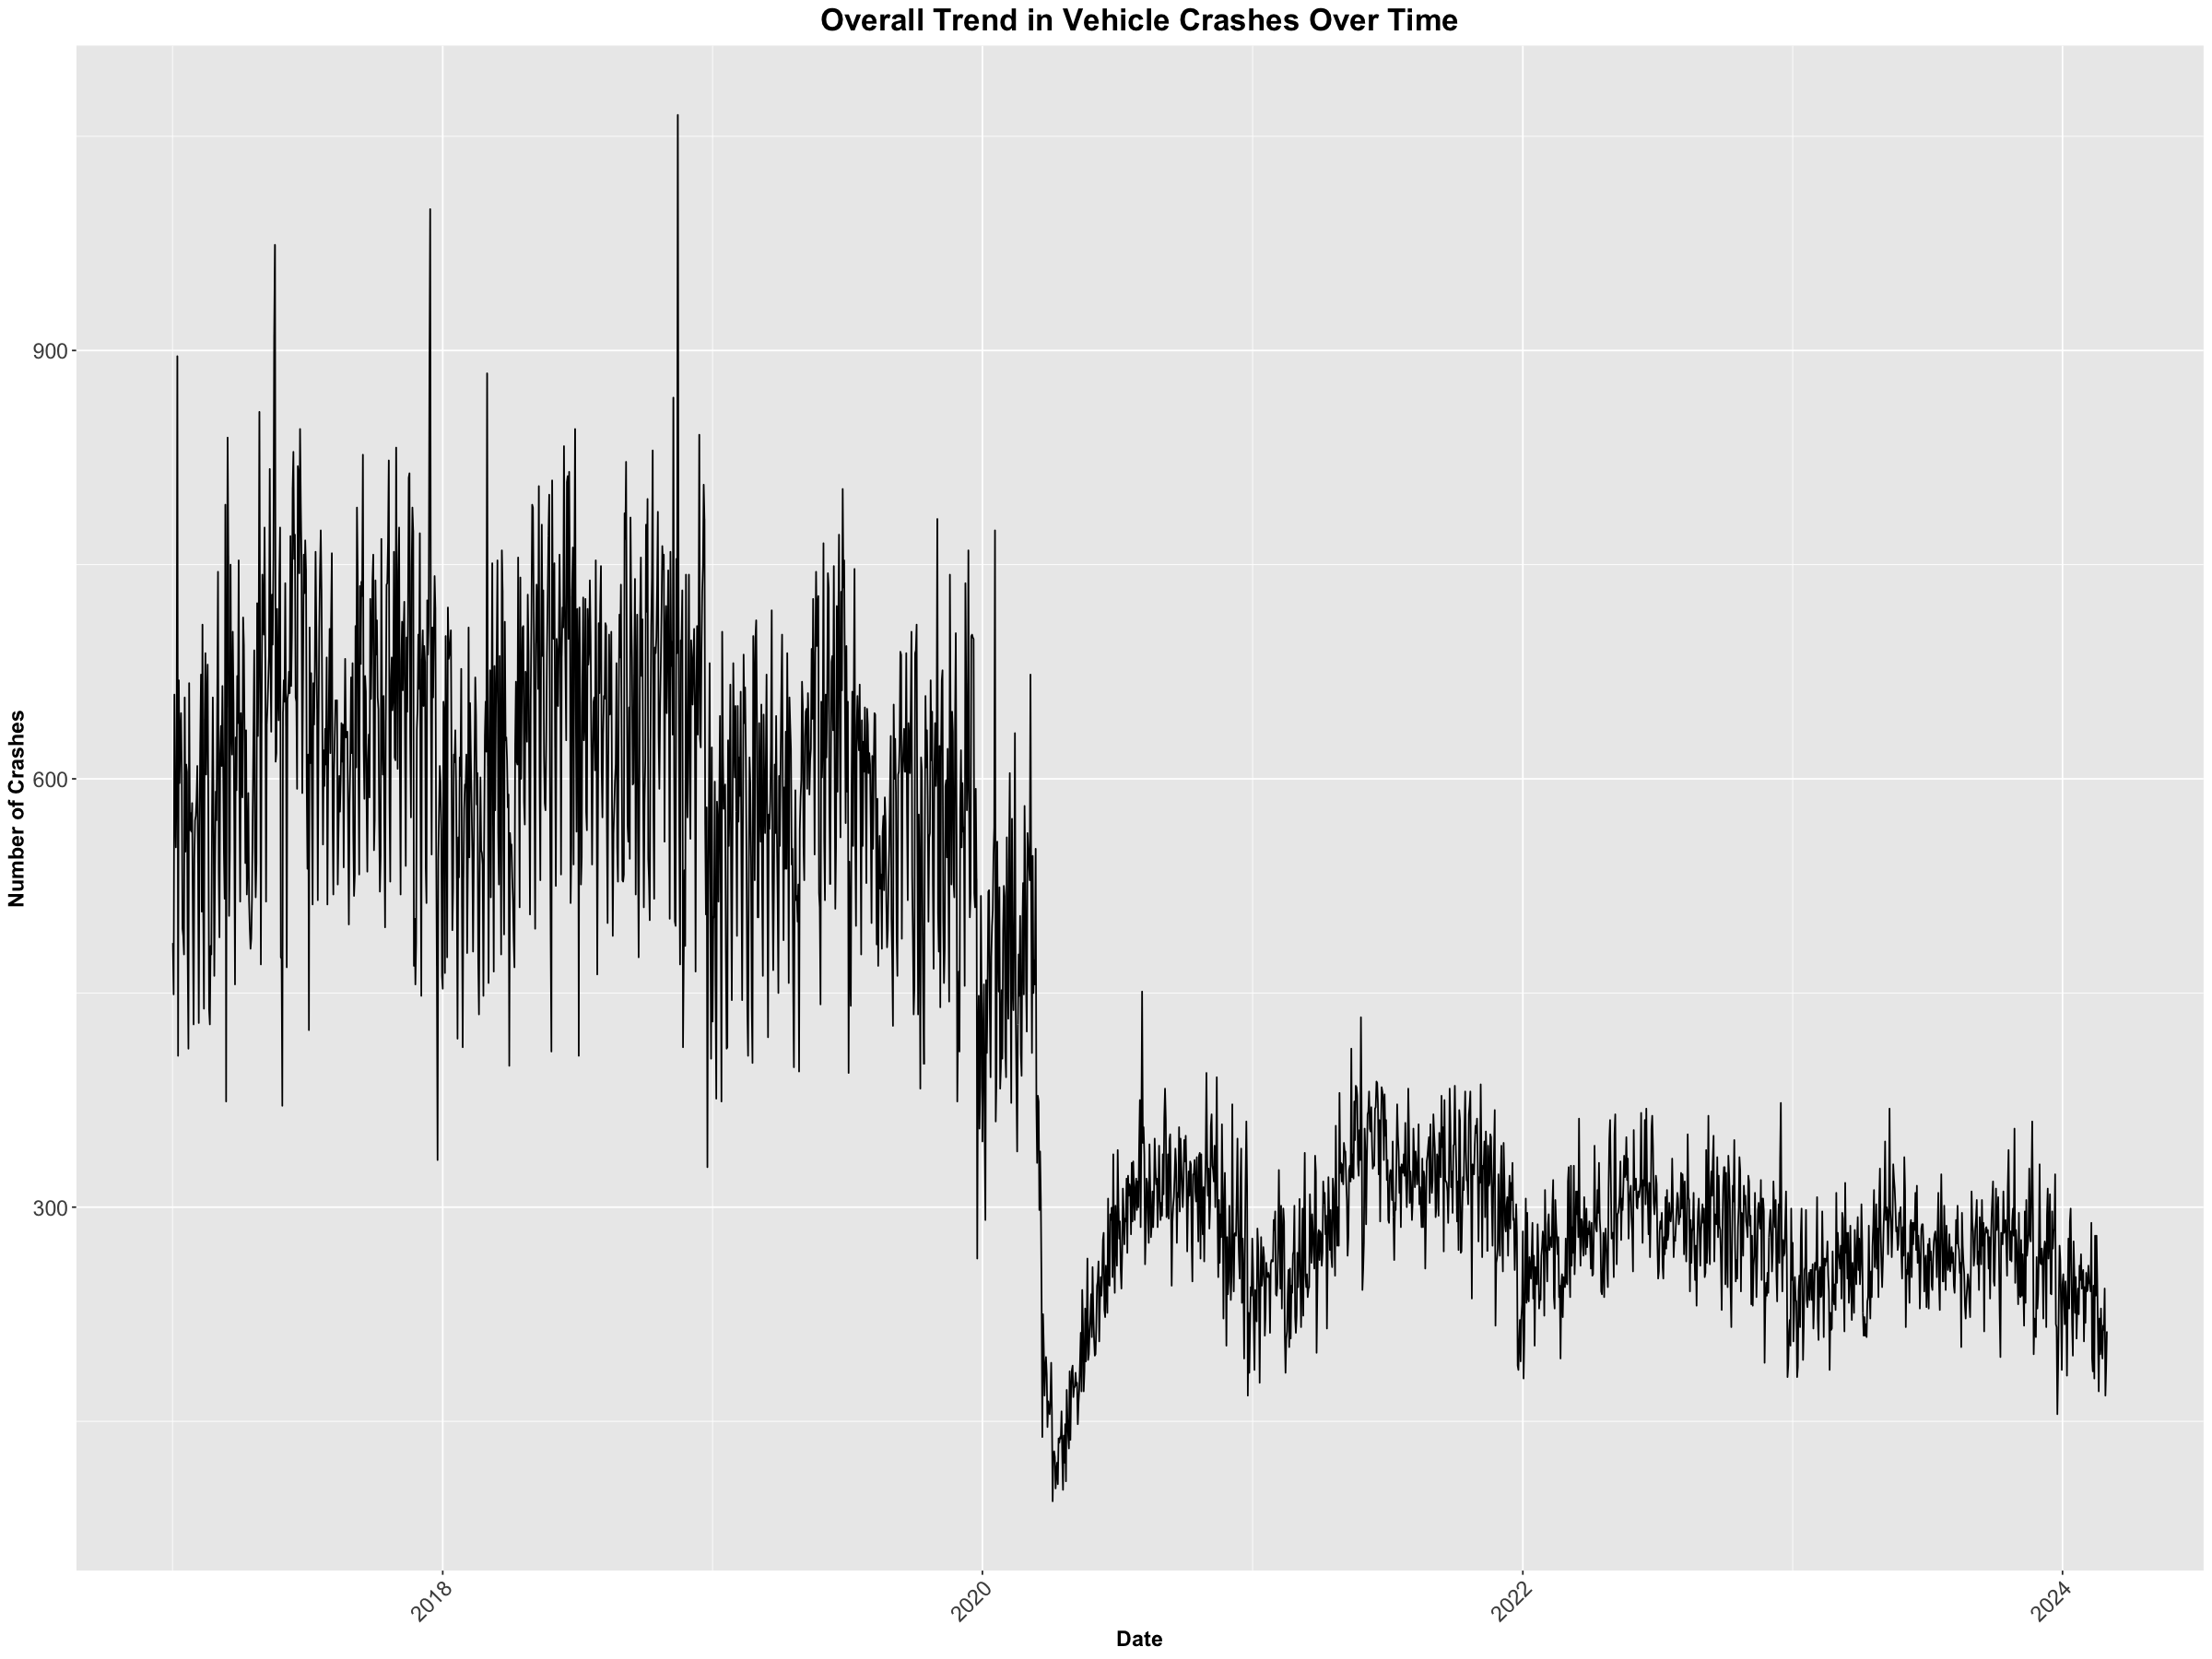

In [54]:
ggplot(sub_crash_df, aes(x = crash_date)) +
  geom_line(stat = "count") +
  labs(title = "Overall Trend in Vehicle Crashes Over Time",
       x = "Date",
       y = "Number of Crashes") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 14),  
        axis.text.y = element_text(size = 14),                       
        axis.title = element_text(size = 14, face = "bold"),          
        plot.title = element_text(hjust = 0.5, face = "bold", size = 20))  


#### 2. Which borough has the highest frequency of vehicle crashes?

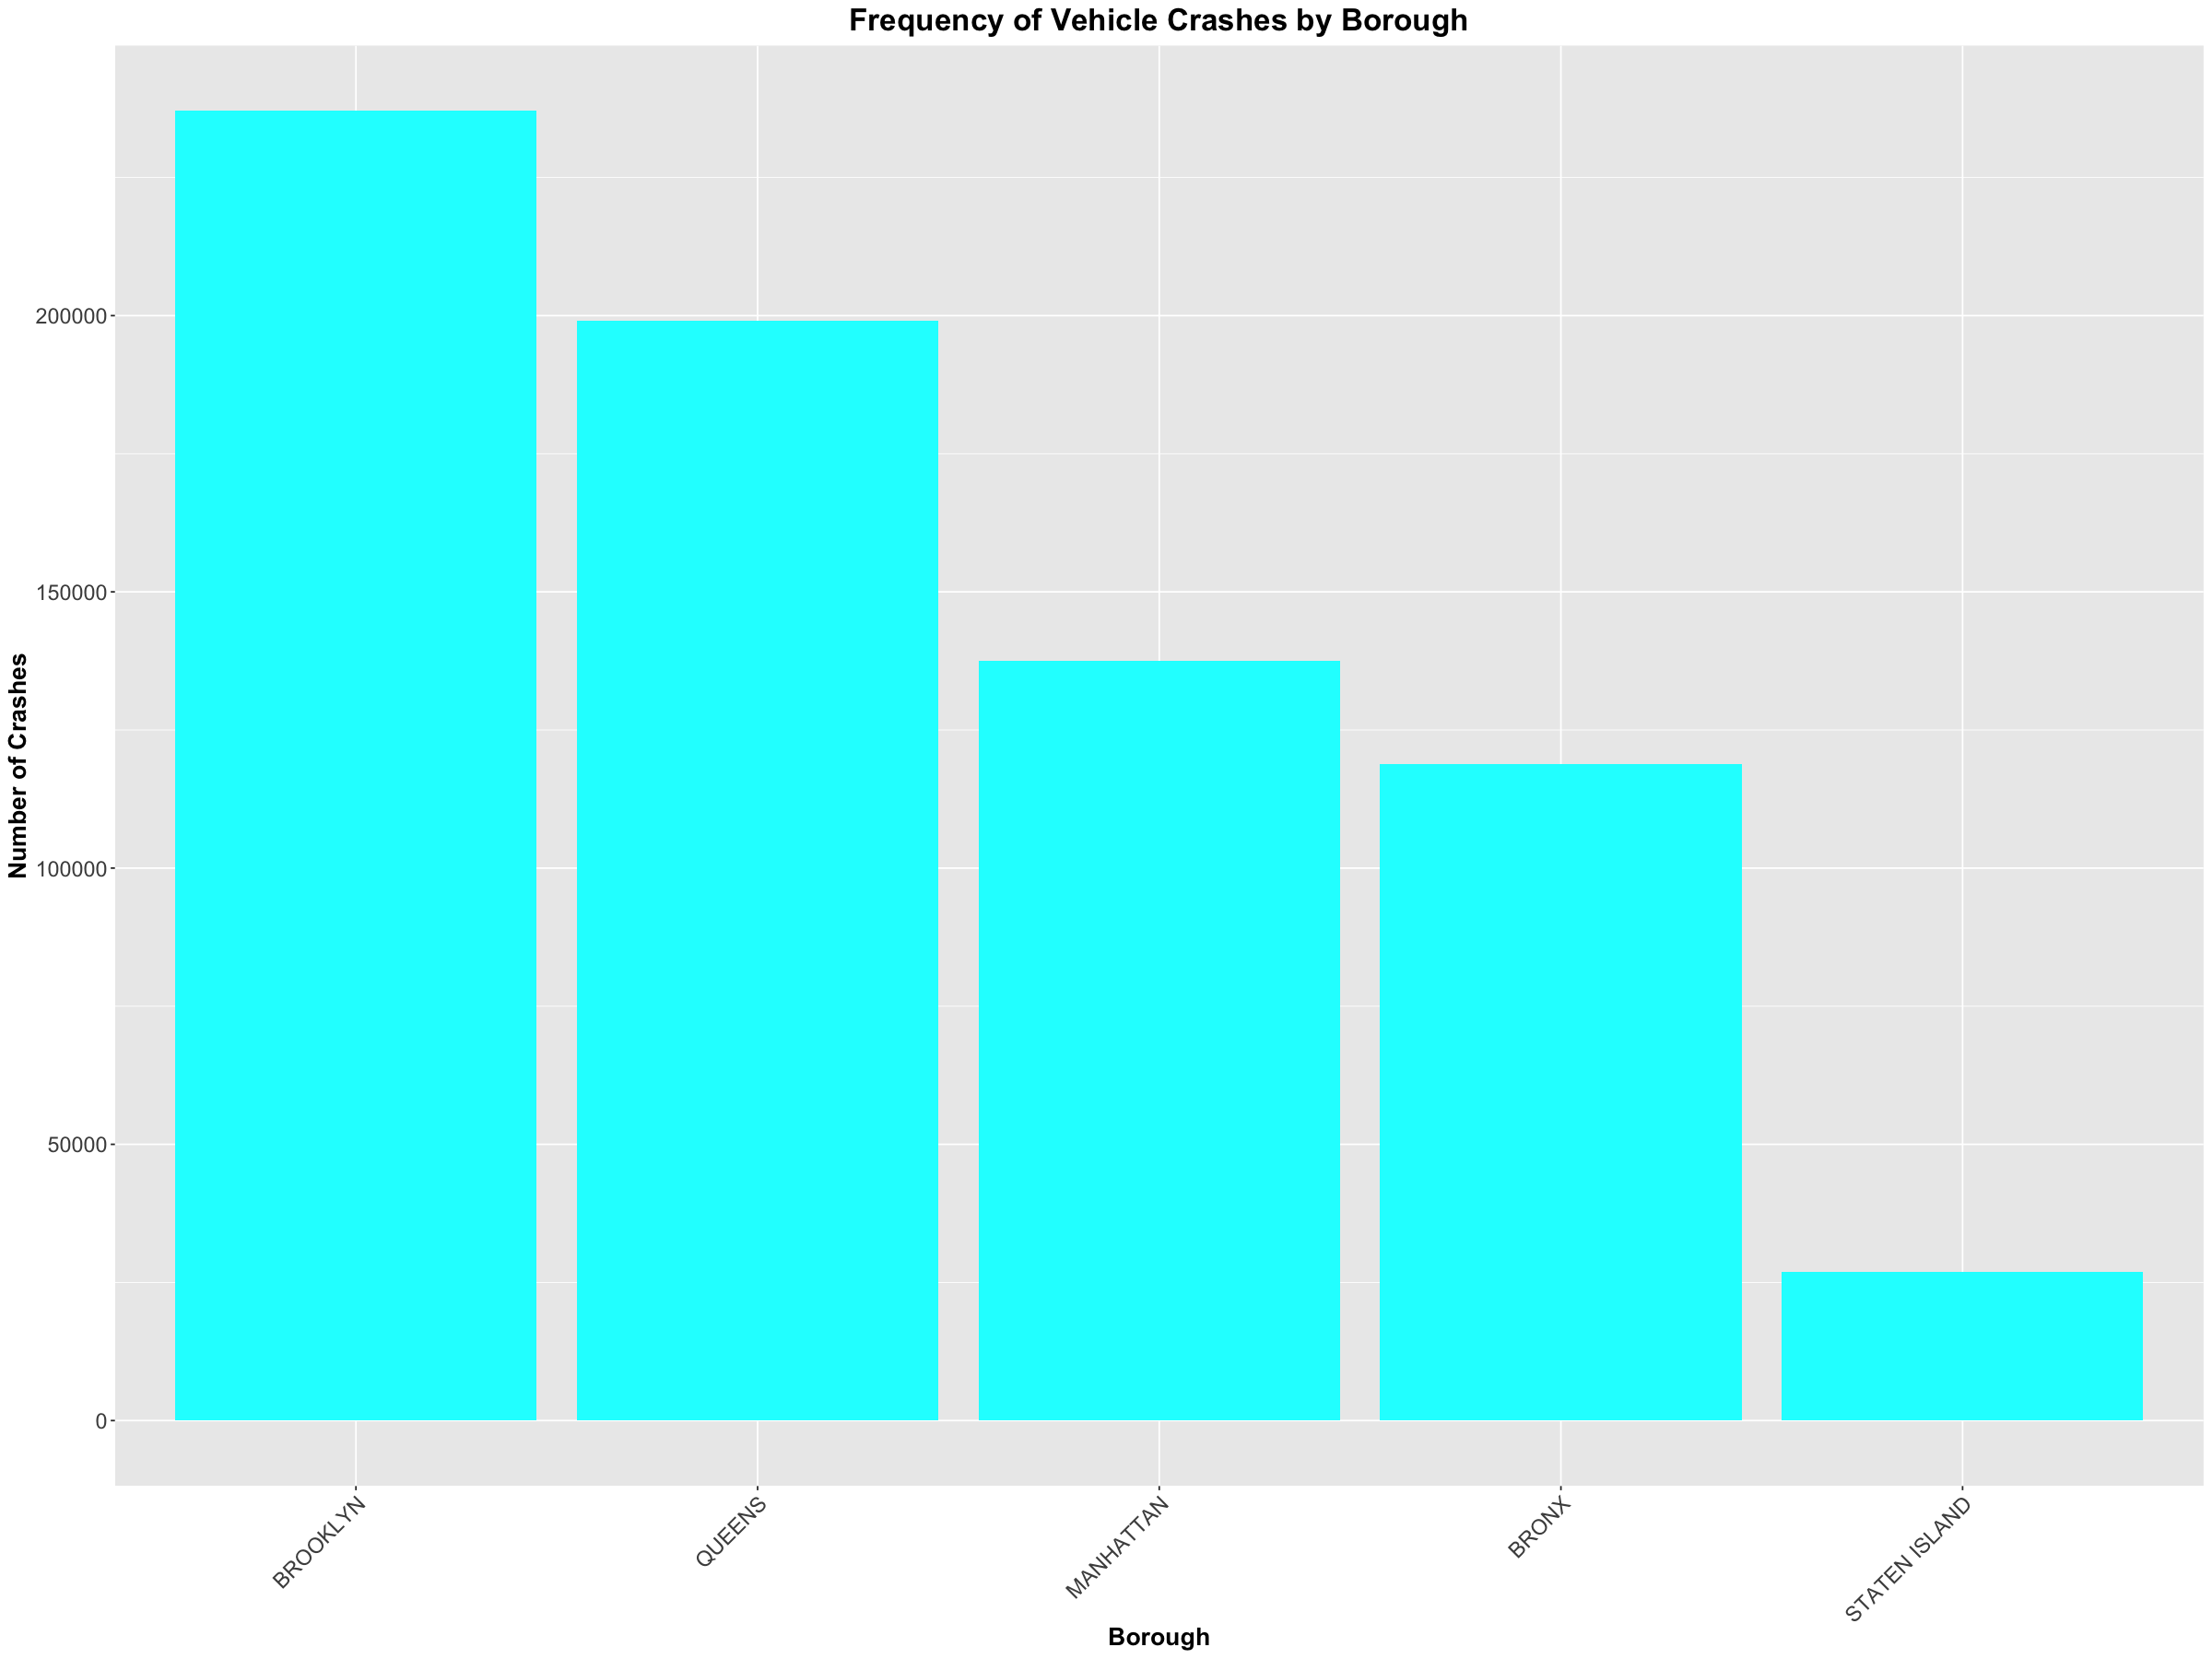

In [56]:
crashes_freq_borough <- sub_crash_df %>%
  filter( borough != "")

borough_counts <- table(crashes_freq_borough$borough)

borough_counts_df <- data.frame(borough = names(borough_counts), count = as.numeric(borough_counts))
borough_counts_df$borough <- factor(borough_counts_df$borough, levels = borough_counts_df$borough[order(-borough_counts_df$count)])

ggplot(borough_counts_df, aes(x = borough, y = count)) +
  geom_bar(stat = "identity", fill = "cyan") +
  labs(title = "Frequency of Vehicle Crashes by Borough",
       x = "Borough",
       y = "Number of Crashes") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 14),  
        axis.text.y = element_text(size = 14),                        
        axis.title = element_text(size = 16, face = "bold"),          
        plot.title = element_text(hjust = 0.5, face = "bold", size = 20))  
  

#### 3. What are the most common contributing factors to vehicle crashes?

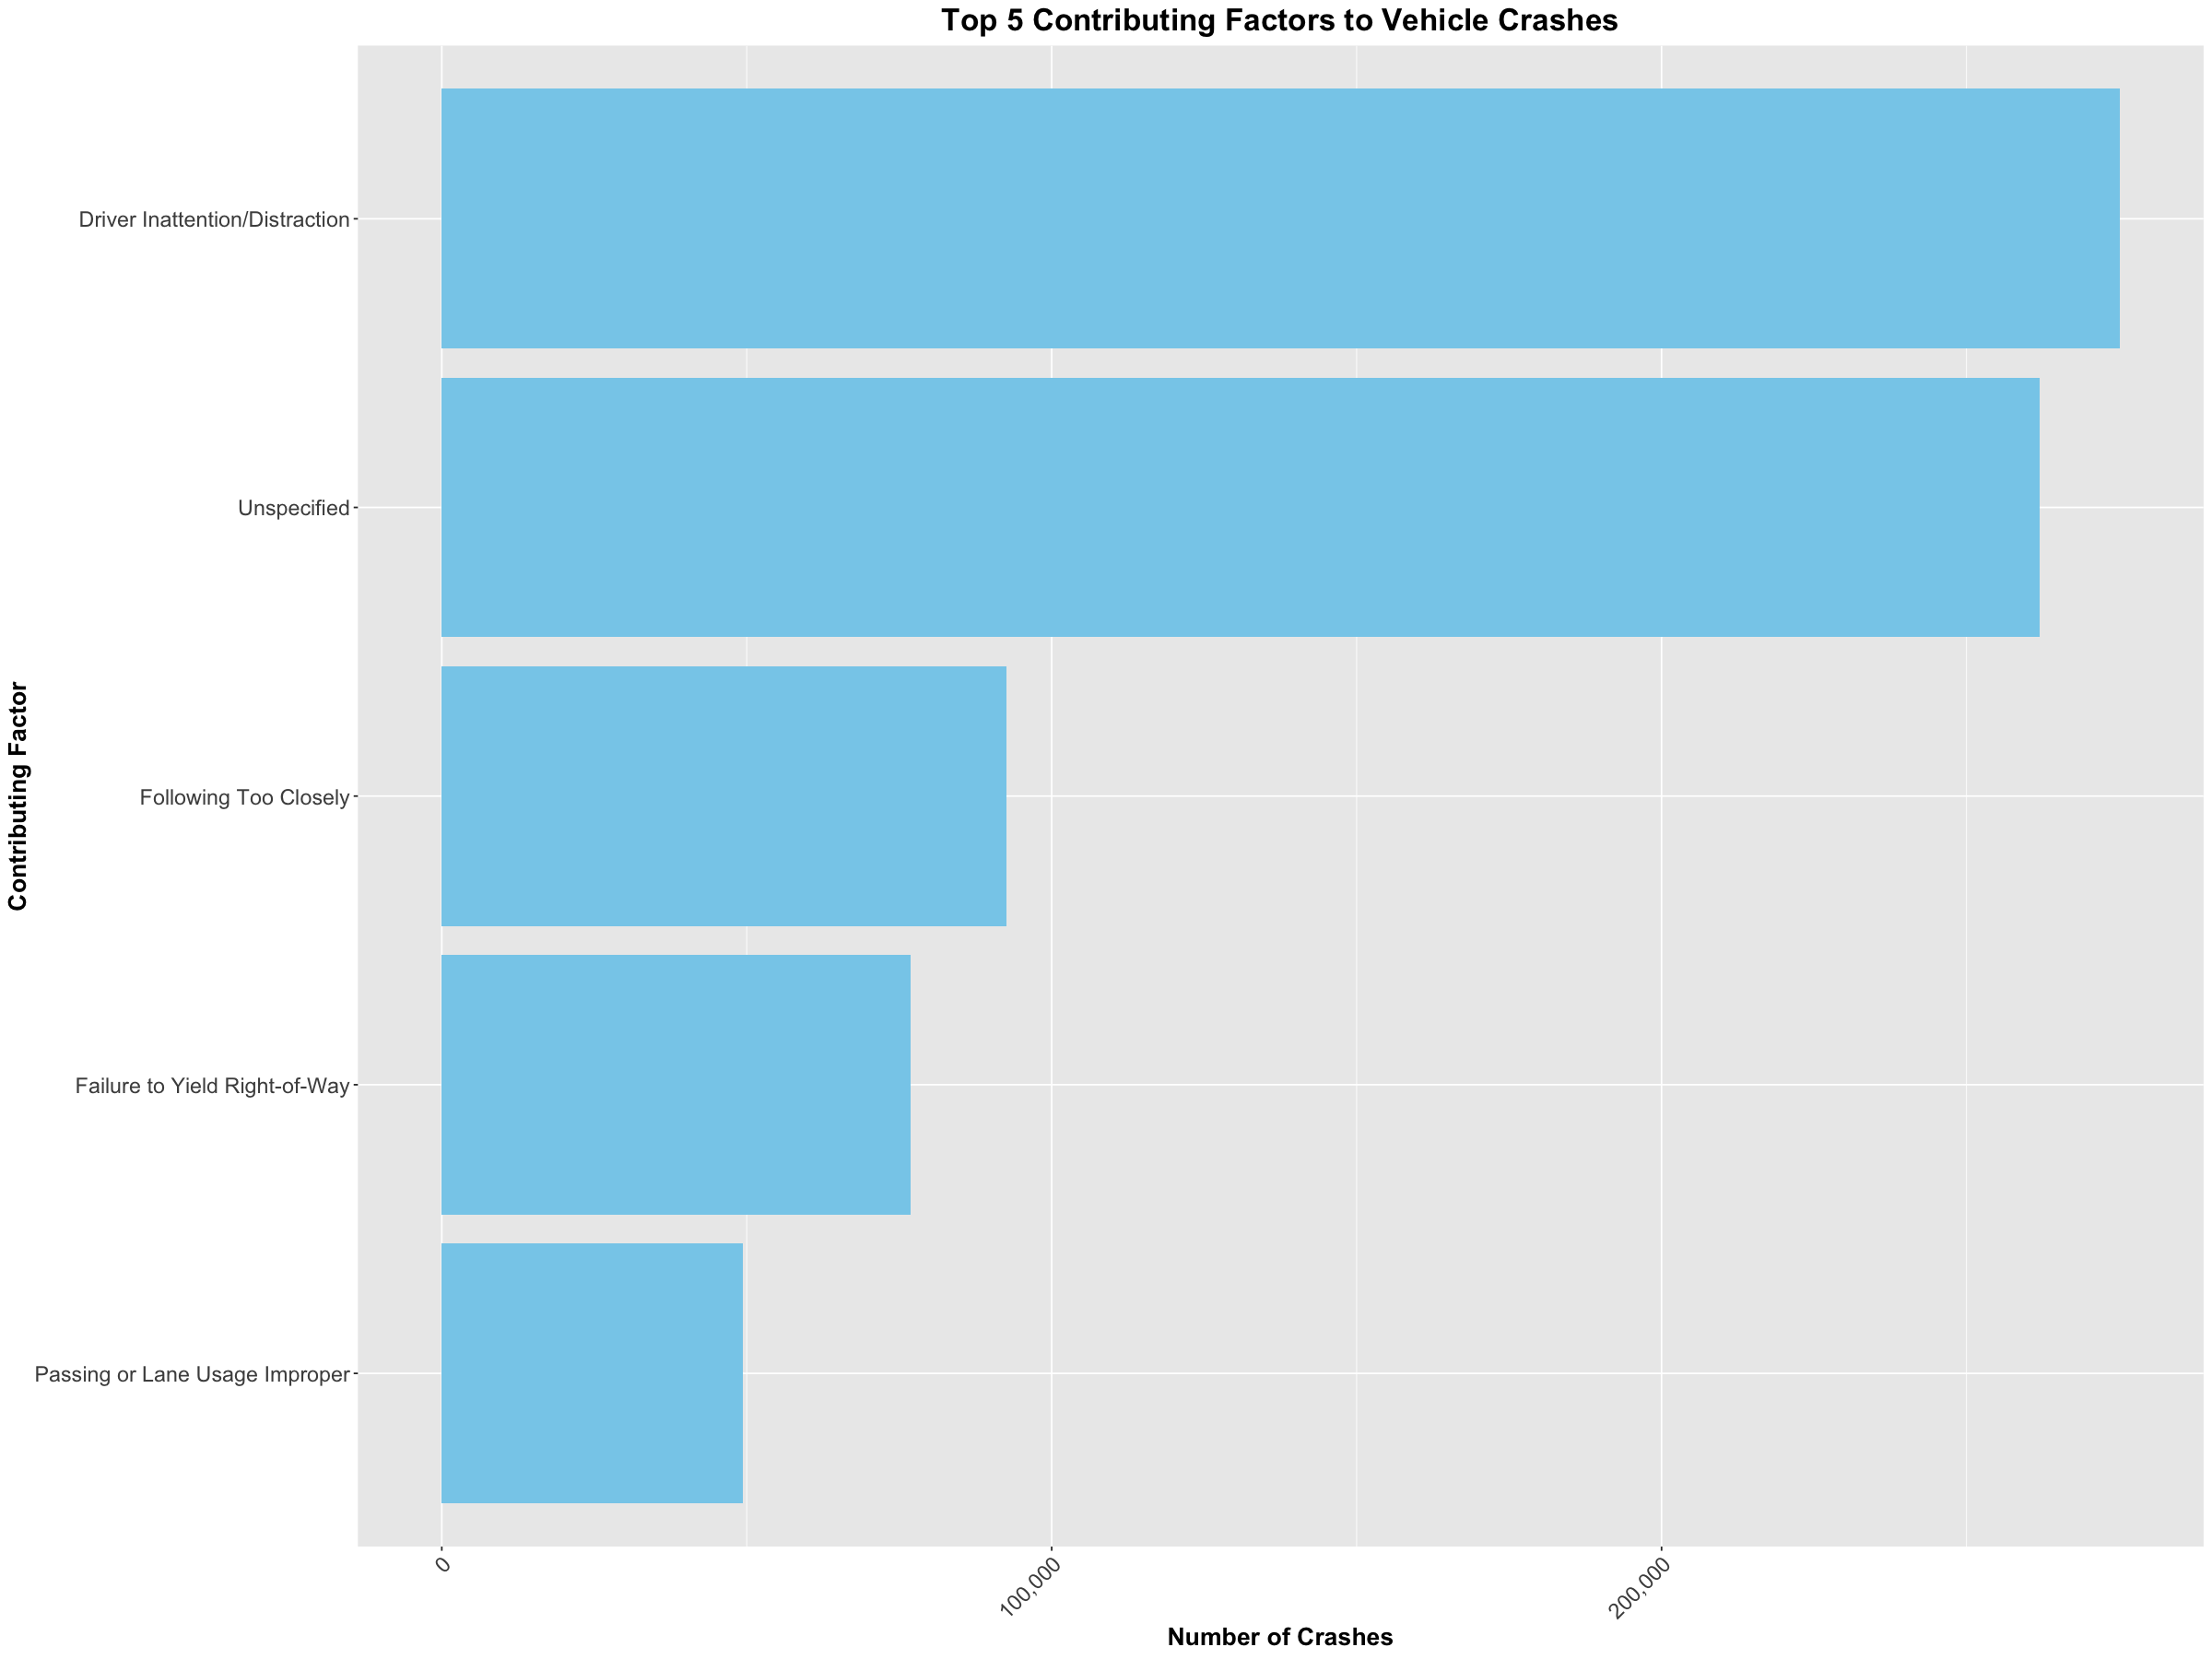

In [63]:
contributing_factors <- sub_crash_df %>%
  filter(!is.na(contributing_factor_vehicle_1),   # Excluding rows with NA 
         contributing_factor_vehicle_1 != "")    # Excluding rows with blank values

# Count occurrences of each contributing factor
top_5_contributing_factors <- contributing_factors %>%
  count(contributing_factor_vehicle_1) %>%
  arrange(desc(n)) %>% head(5)

top_5_contributing_factors$contributing_factor_vehicle_1 <- factor(top_5_contributing_factors$contributing_factor_vehicle_1,
                                                                   levels = top_5_contributing_factors$contributing_factor_vehicle_1[order(top_5_contributing_factors$n)])

ggplot(top_5_contributing_factors, aes(x = contributing_factor_vehicle_1, y = n)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Top 5 Contributing Factors to Vehicle Crashes",
       x = "Contributing Factor",
       y = "Number of Crashes") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 14),  
        axis.text.y = element_text(size = 14),                        
        axis.title = element_text(size = 16, face = "bold"),          
        plot.title = element_text(hjust = 0.5, face = "bold", size = 20)) +  
  coord_flip() +                                                     
  scale_y_continuous(labels = comma_format())                        


#### 4. What is the average number of persons injured or killed per crash?


In [26]:
sub_crash_df$total_injuries_deaths <- sub_crash_df$total_injury + sub_crash_df$total_casualty
average_injuries_deaths_per_crash <- mean(sub_crash_df$total_injuries_deaths)

cat("Average number of persons injured or killed per crash:", average_injuries_deaths_per_crash)

Average number of persons injured or killed per crash: 0.7064521

#### 5.  What are the most common types of vehicles involved in crashes?

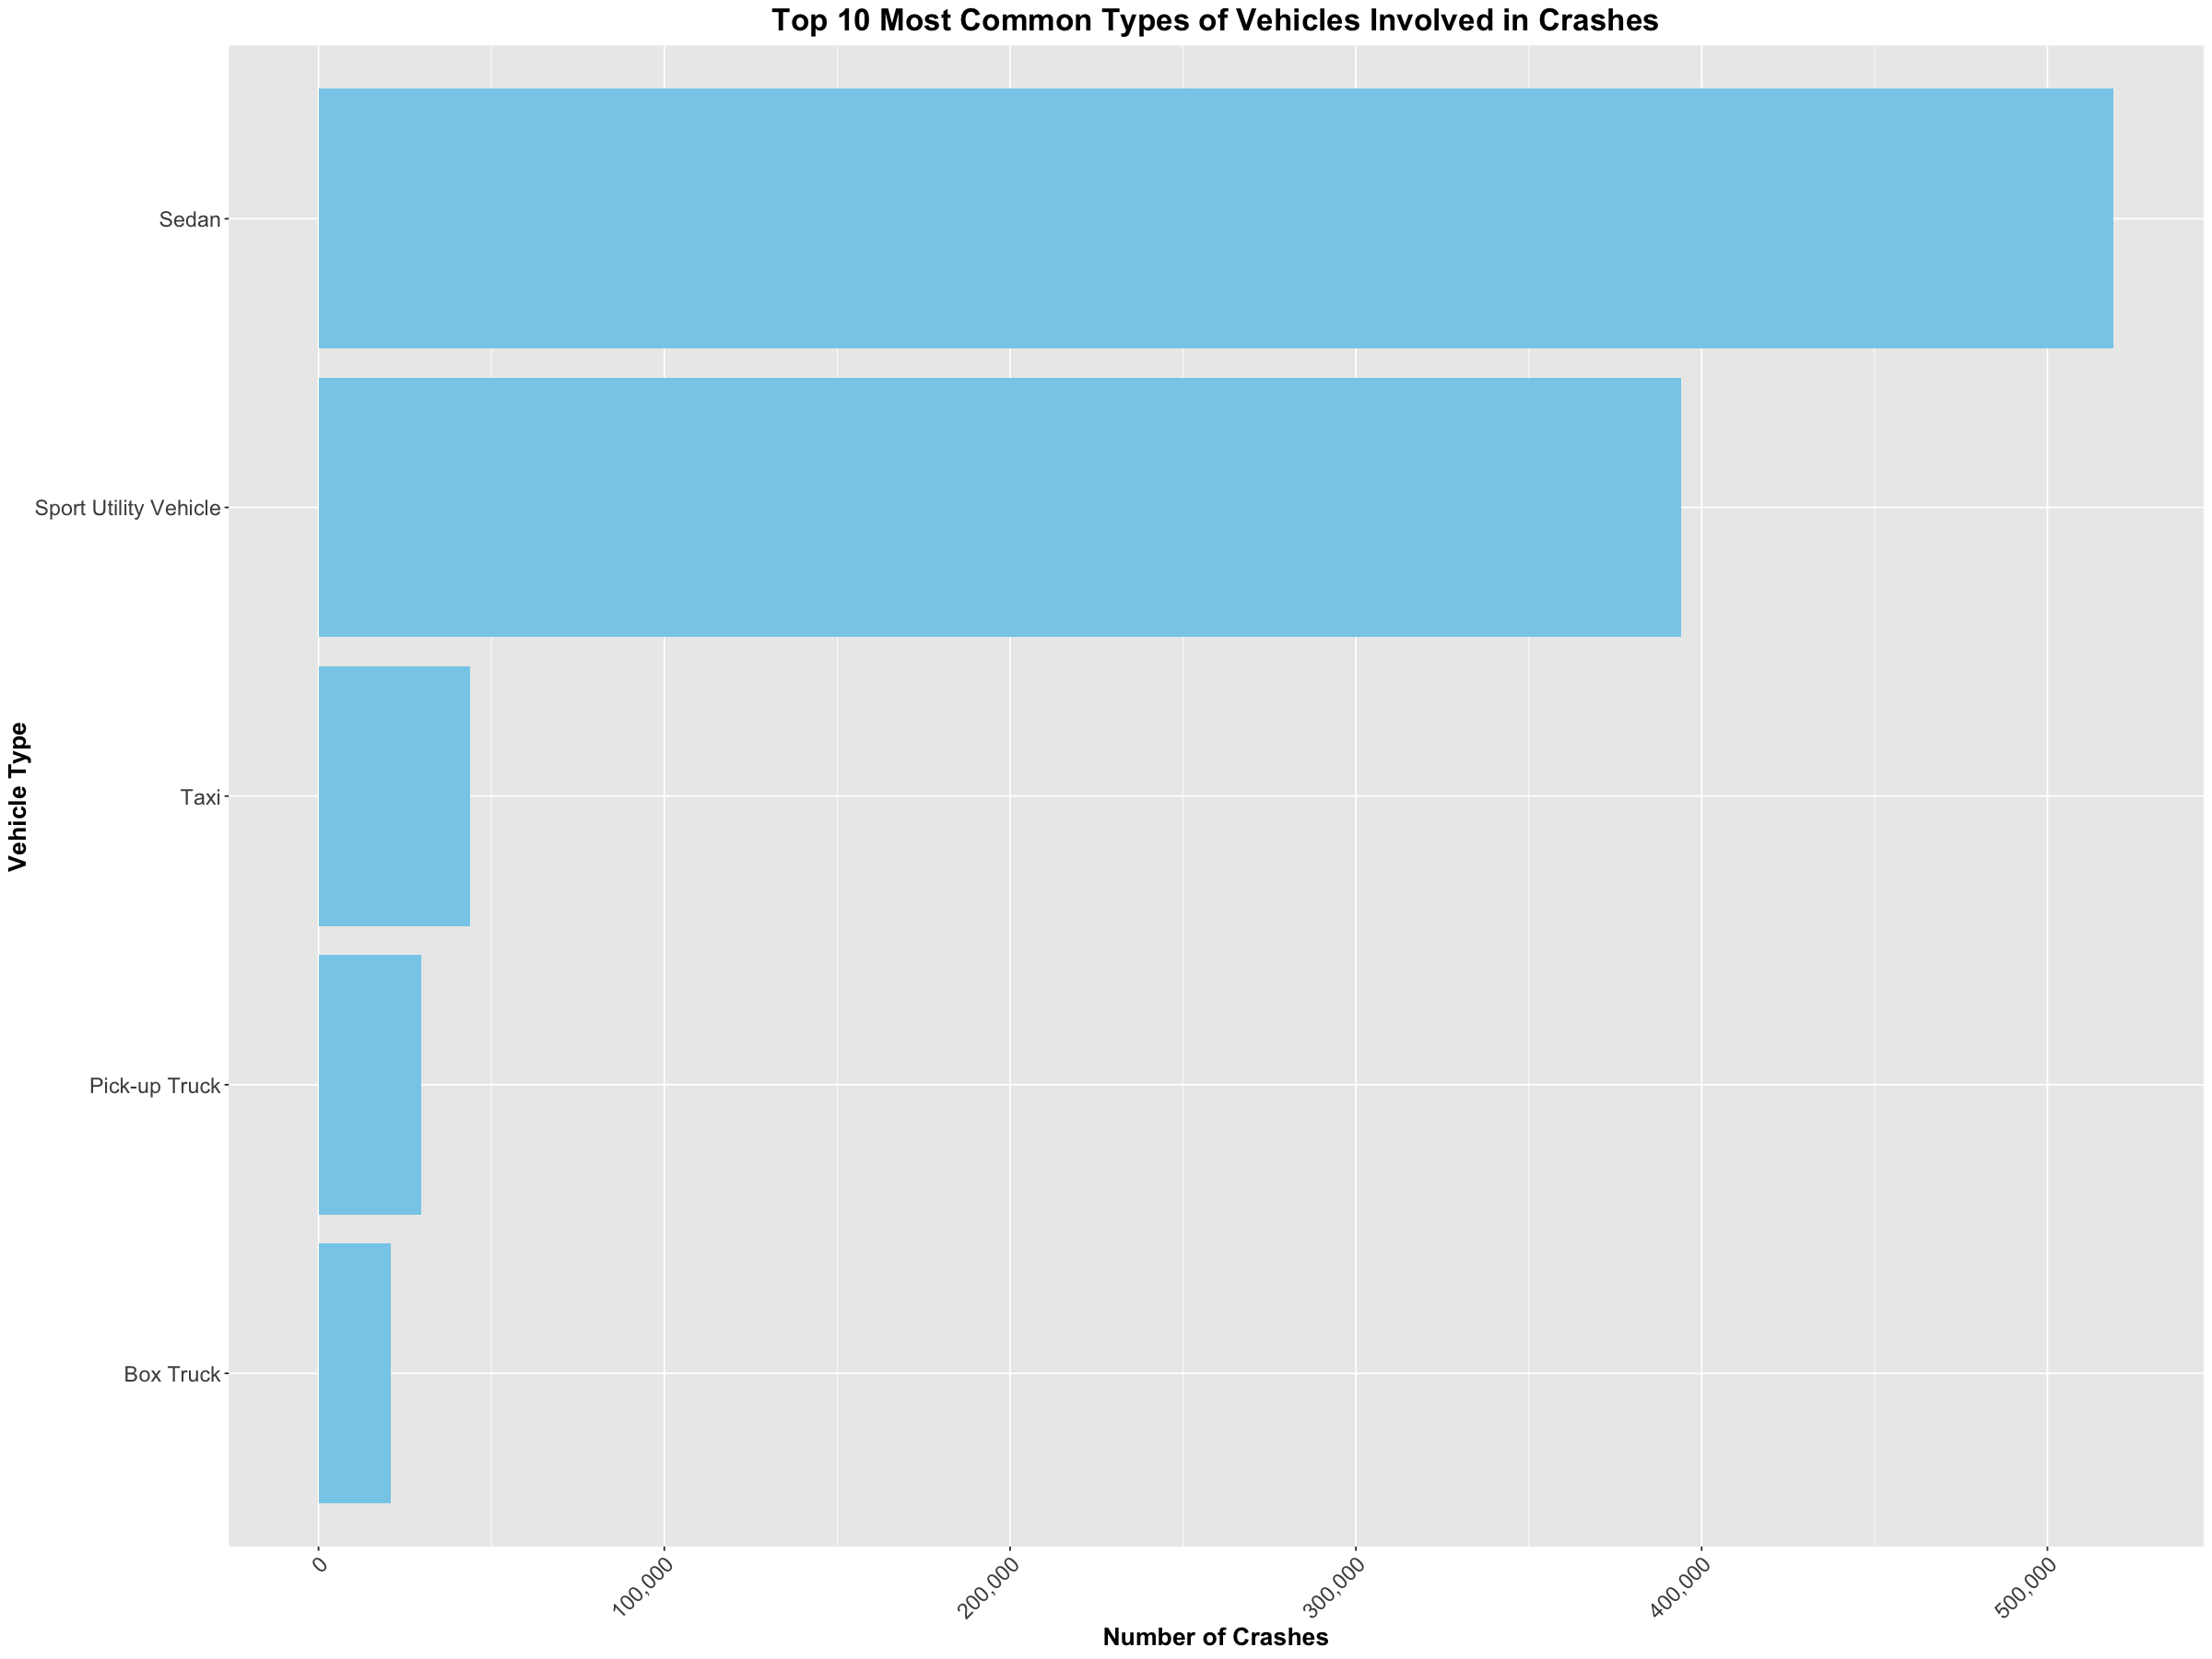

In [64]:
vehicle_type_data <- sub_crash_df[sub_crash_df$vehicle_type_code_1 != "", ]

vehicle_type_counts <- table(vehicle_type_data$vehicle_type_code_1)

vehicle_type_counts_df <- data.frame(vehicle_type = names(vehicle_type_counts),
                                     frequency = as.numeric(vehicle_type_counts))

# Sorting df by frequency
vehicle_type_counts_df <- vehicle_type_counts_df[order(-vehicle_type_counts_df$frequency), ]

ggplot(vehicle_type_counts_df[1:5, ], aes(x = reorder(vehicle_type, frequency), y = frequency)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Top 10 Most Common Types of Vehicles Involved in Crashes",
       x = "Vehicle Type",
       y = "Number of Crashes") +
 theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 14),  
        axis.text.y = element_text(size = 14),                        
        axis.title = element_text(size = 16, face = "bold"),          
        plot.title = element_text(hjust = 0.5, face = "bold", size = 20)) +  
  coord_flip() +                                                     
  scale_y_continuous(labels = comma_format())                        


#### 6.  Deaths and injured count every year from 2017 to 2023

In [29]:
yearly_crashes_df <- sub_crash_df %>% group_by(Year =year) %>% 
  summarise(Injury=sum(total_injury), Casualty=sum(total_casualty))

yearly_df <- data.frame(yearly_crashes_df)
print(yearly_df)

  Year Injury Casualty
1 2017 121311      517
2 2018 123859      462
3 2019 122777      488
4 2020  89228      538
5 2021 101430      580
6 2022 101470      558
7 2023 106049      532
8 2024  15852       82


#### 7.  Monthly distribution of crashes 

In [68]:
monthlyPlot <- function(Selectedyear) {
  monthly_crash_df <- sub_crash_df %>% filter(year==Selectedyear) %>% group_by(month) %>% 
    summarise(Injury=sum(total_injury), Casualty=sum(total_casualty))
  return(monthly_crash_df)
  
}

# Create an empty list to store dataframes for each year
monthly_crash_list <- list()

# Loop through each year from 2017 to 2024 and call monthlyPlot function
for (year in 2017:2023) {
  monthly_crash_list[[as.character(year)]] <- monthlyPlot(year)
}

# Combine the dataframes for all years
monthly_crash_combined <- bind_rows(monthly_crash_list, .id = "Year")

In [69]:
monthly_crash_combined$month <-  as.numeric(monthly_crash_combined$month)
monthly_crash_combined$Injury <-  as.numeric(monthly_crash_combined$Injury)
monthly_crash_combined$Casualty <- as.numeric(monthly_crash_combined$Casualty)
temp_df <- data.frame(monthly_crash_combined)


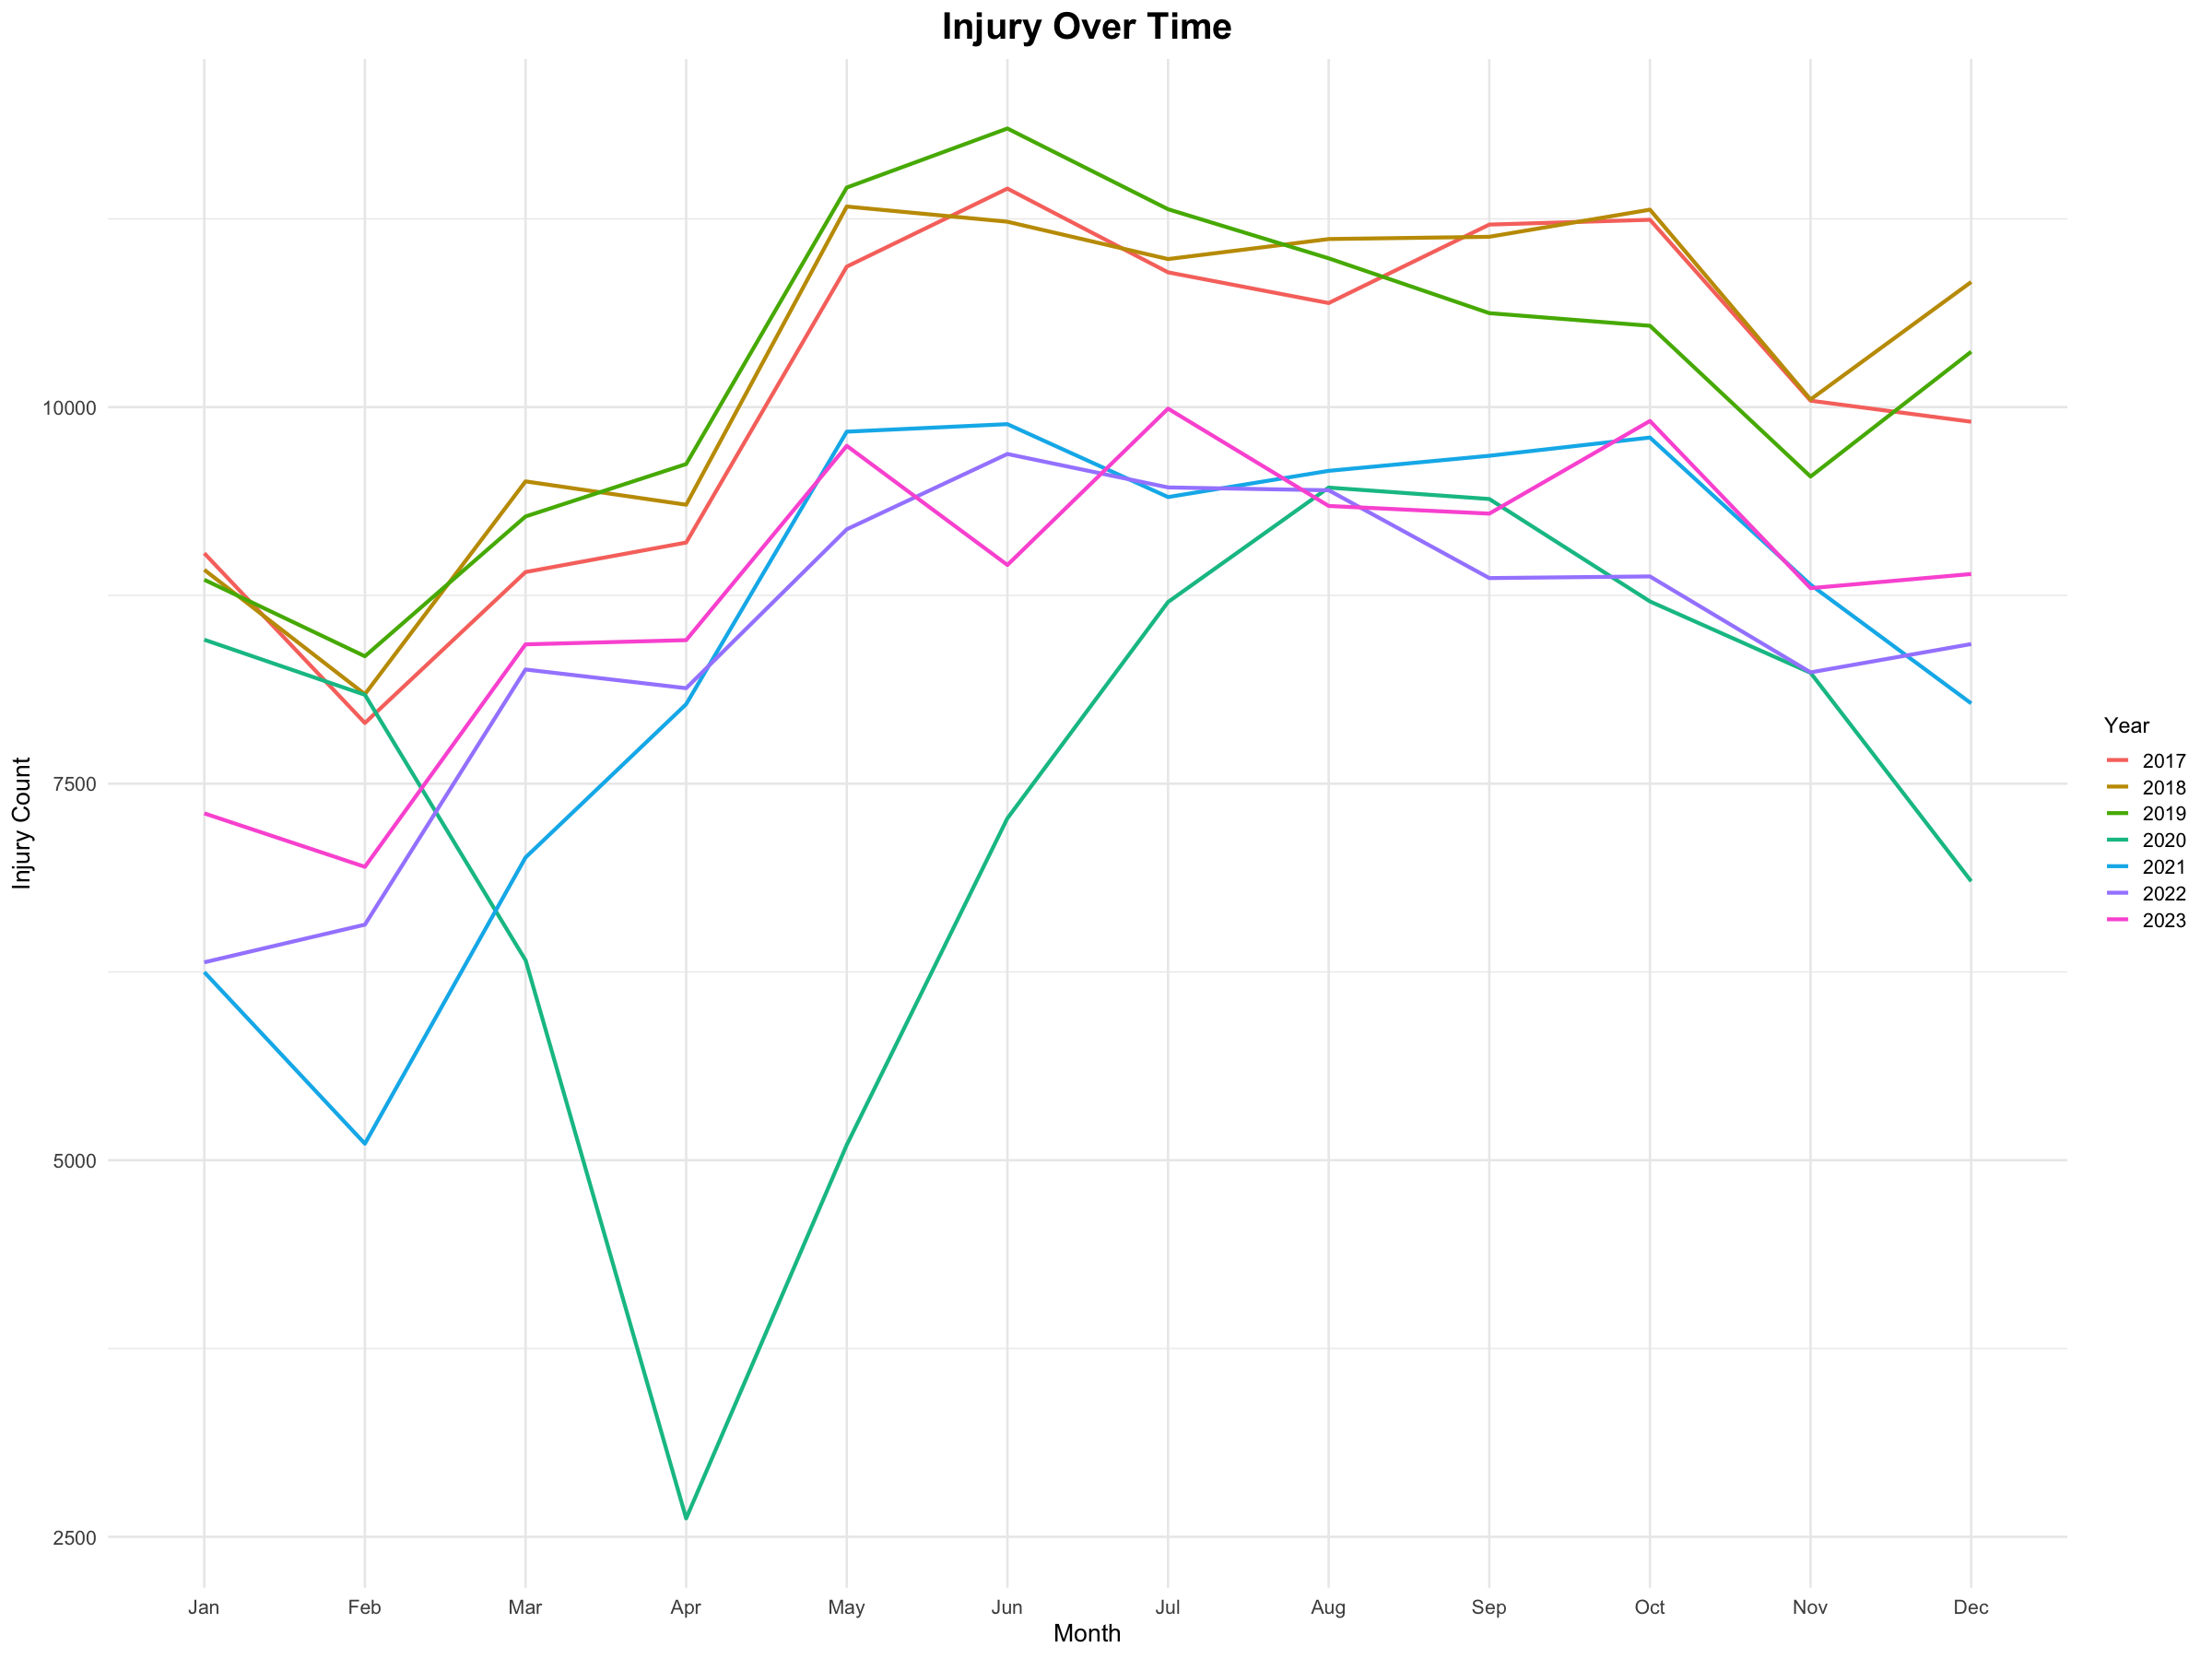

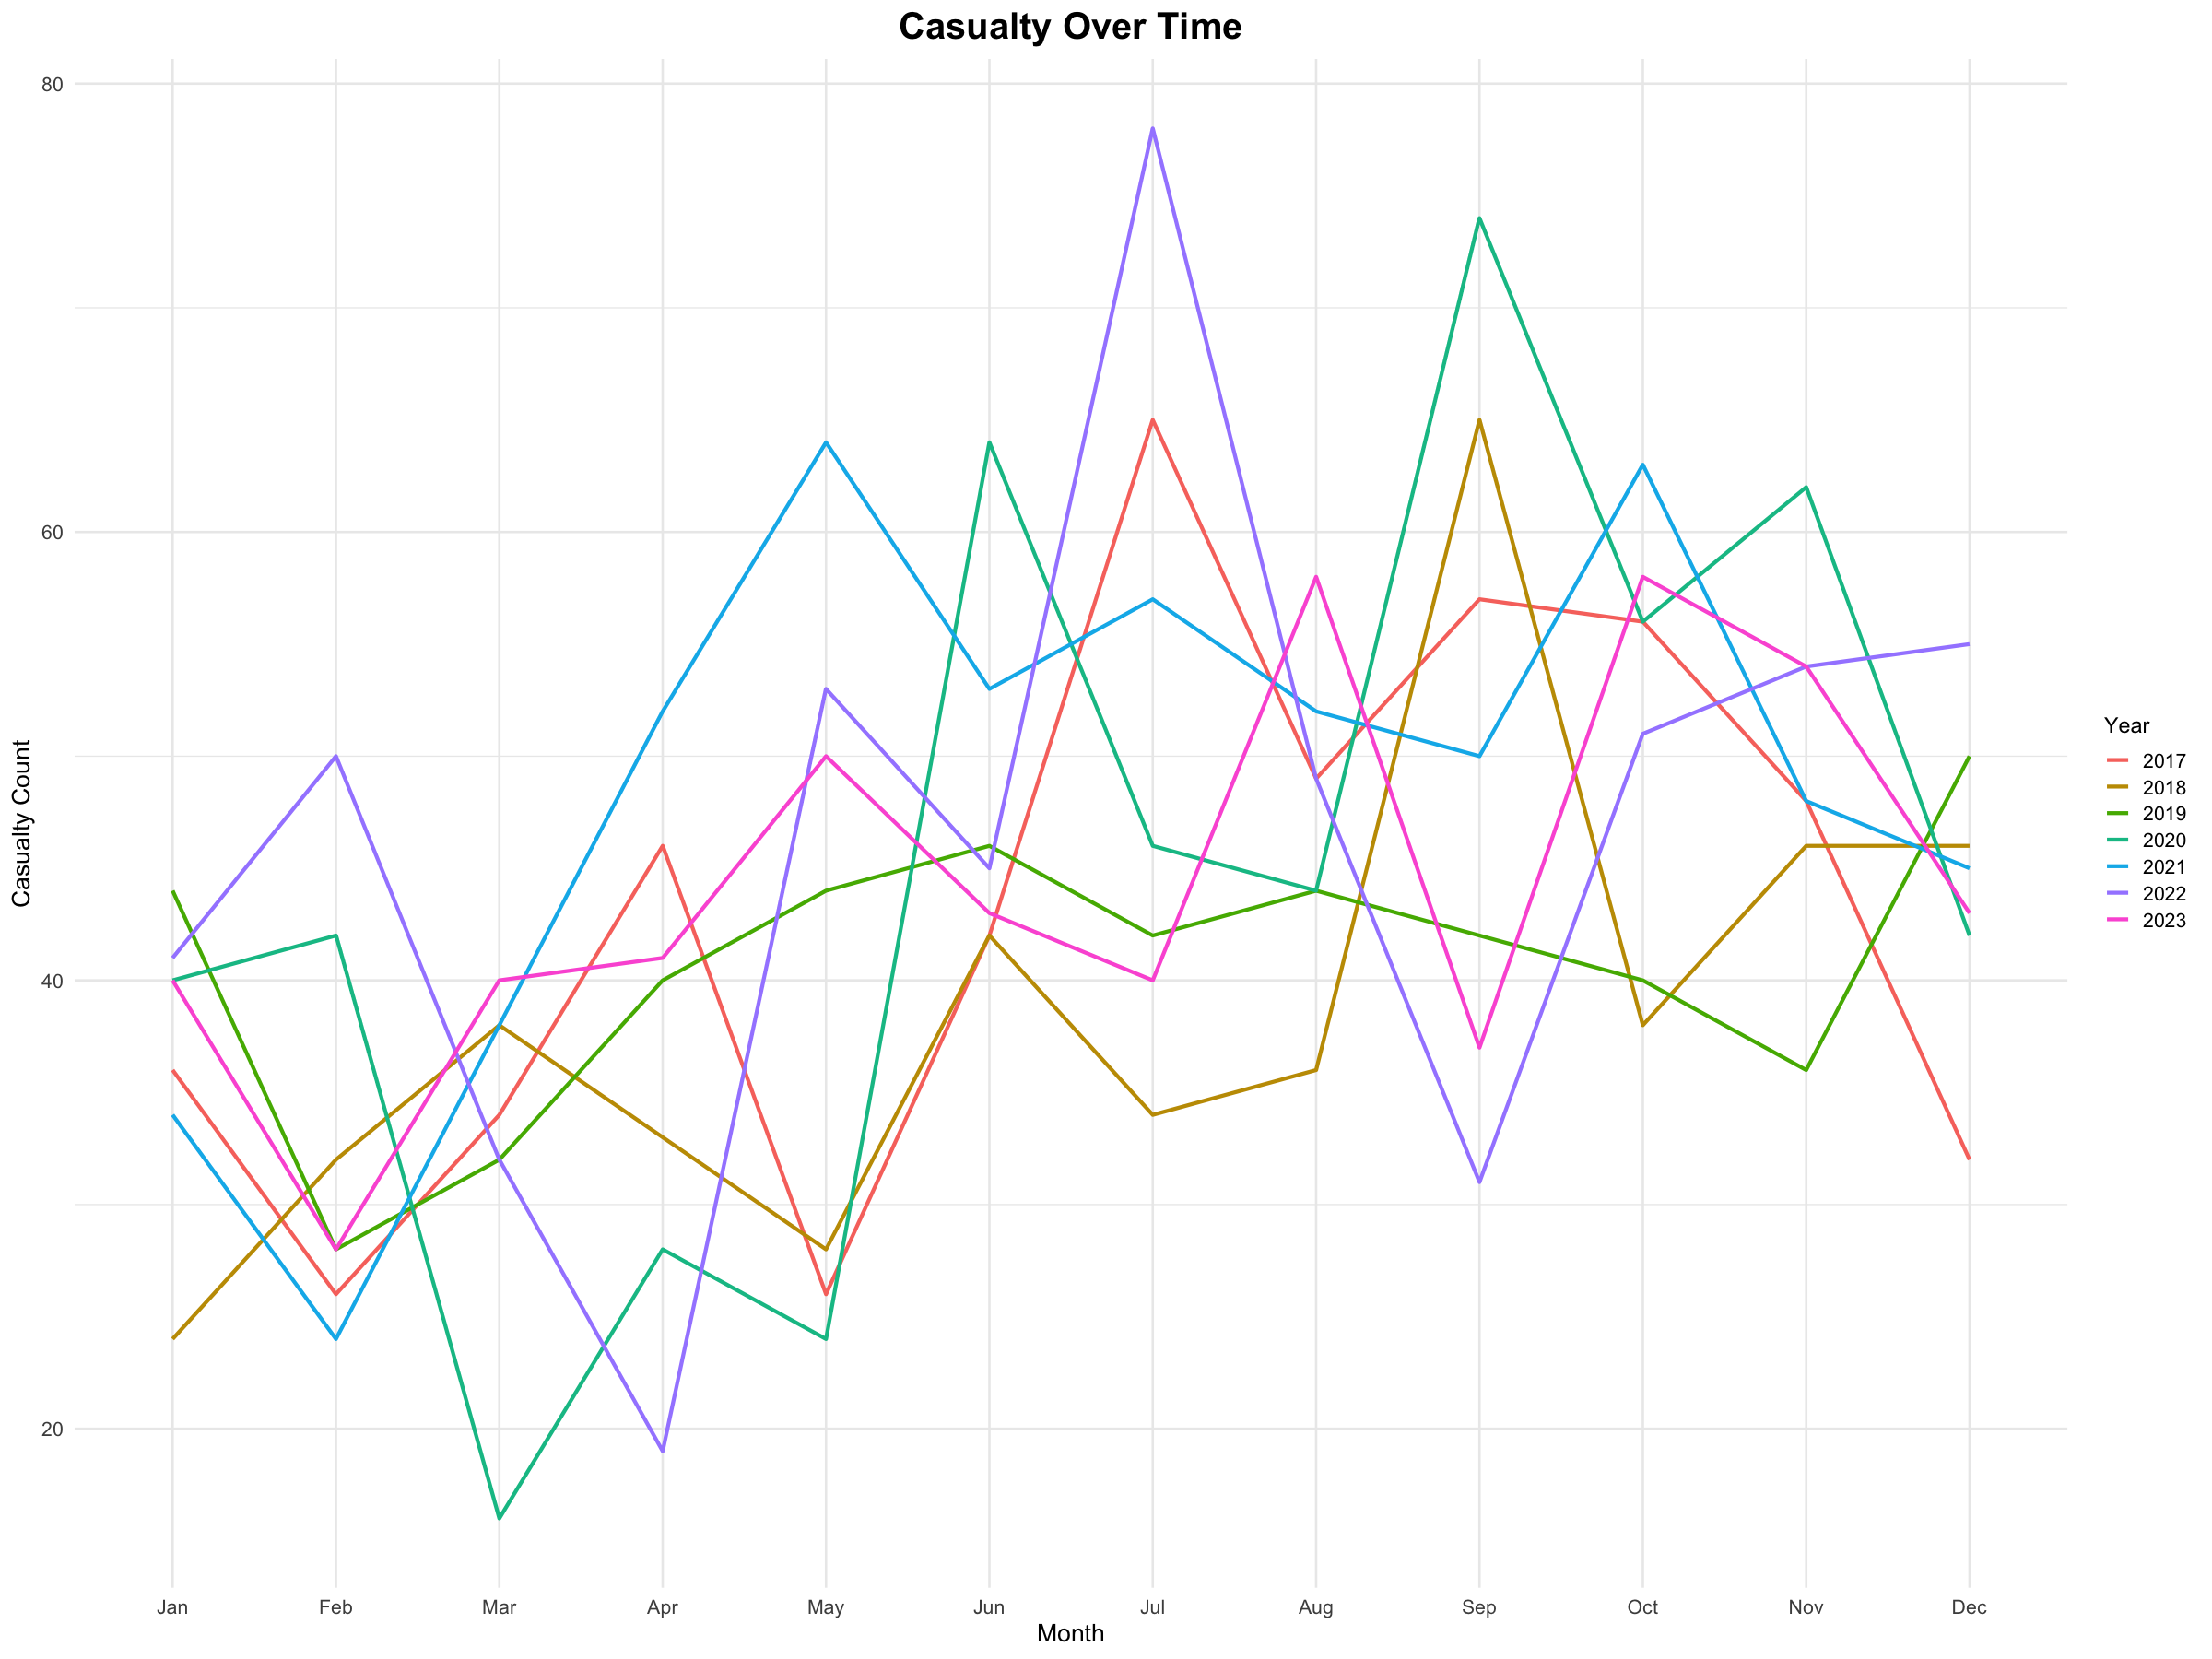

In [72]:
# Plot a line chart for all years with different colors
ggplot(temp_df, aes(x = month, y = Injury, group = Year, color = Year)) +
  geom_line(size = 1.2) +
  labs(title = "Injury Over Time", x = "Month", y = "Injury Count") +
  theme_minimal(base_size = 16) +
  theme(plot.title = element_text(face = "bold", size = 24, hjust = 0.5),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        legend.title = element_text(size = 14))


ggplot(temp_df, aes(x = month, y = Casualty, group = Year, color = Year)) +
  geom_line(size = 1.2) +
  labs(title = "Casualty Over Time", x = "Month", y = "Casualty Count") +
  theme_minimal(base_size = 16) +
  theme(plot.title = element_text(face = "bold", size = 24, hjust = 0.5),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        legend.title = element_text(size = 14))

#### 8. calculating monthly stat measures 

In [40]:
# Aggregate by month and find month with high crash count
monthly_sum <- aggregate(Injury ~ month, data = temp_df, sum)
monthly_sum <- monthly_sum[order(-monthly_sum$Injury), ]

In [41]:
# Calculate monthly statistical measures
monthly_stats <- temp_df %>%
  group_by(month) %>%
  summarise(
    Mean = mean(Injury),
    Median = median(Injury),
    SD = sd(Injury),
    Min = min(Injury),
    Max = max(Injury)
  )%>%
  arrange(desc(Mean))

print(monthly_stats)
monthlY_stats_df_Injury <- data.frame(monthly_stats)
monthlY_stats_df_Injury$Mean <- as.integer(monthlY_stats_df_Injury$Mean)

# A tibble: 12 × 6
   month   Mean Median    SD   Min   Max
   <fct>  <dbl>  <dbl> <dbl> <dbl> <dbl>
 1 Jul   10108.   9990  977.  8706 11314
 2 Aug   10090    9577  800.  9344 11116
 3 Oct   10055.   9908 1042.  8710 11311
 4 Jun   10047.   9887 1617.  7270 11850
 5 Sep   10027.   9677  948.  8865 11212
 6 May    9656.   9837 2186.  5102 11458
 7 Nov    9104.   8821  779.  8236 10051
 8 Dec    9044.   8892 1409.  6852 10831
 9 Mar    8244.   8425 1178.  6328  9507
10 Apr    7902.   8453 2407.  2622  9622
11 Jan    7875.   8456 1234.  6249  9030
12 Feb    7294.   7903 1167.  5110  8346


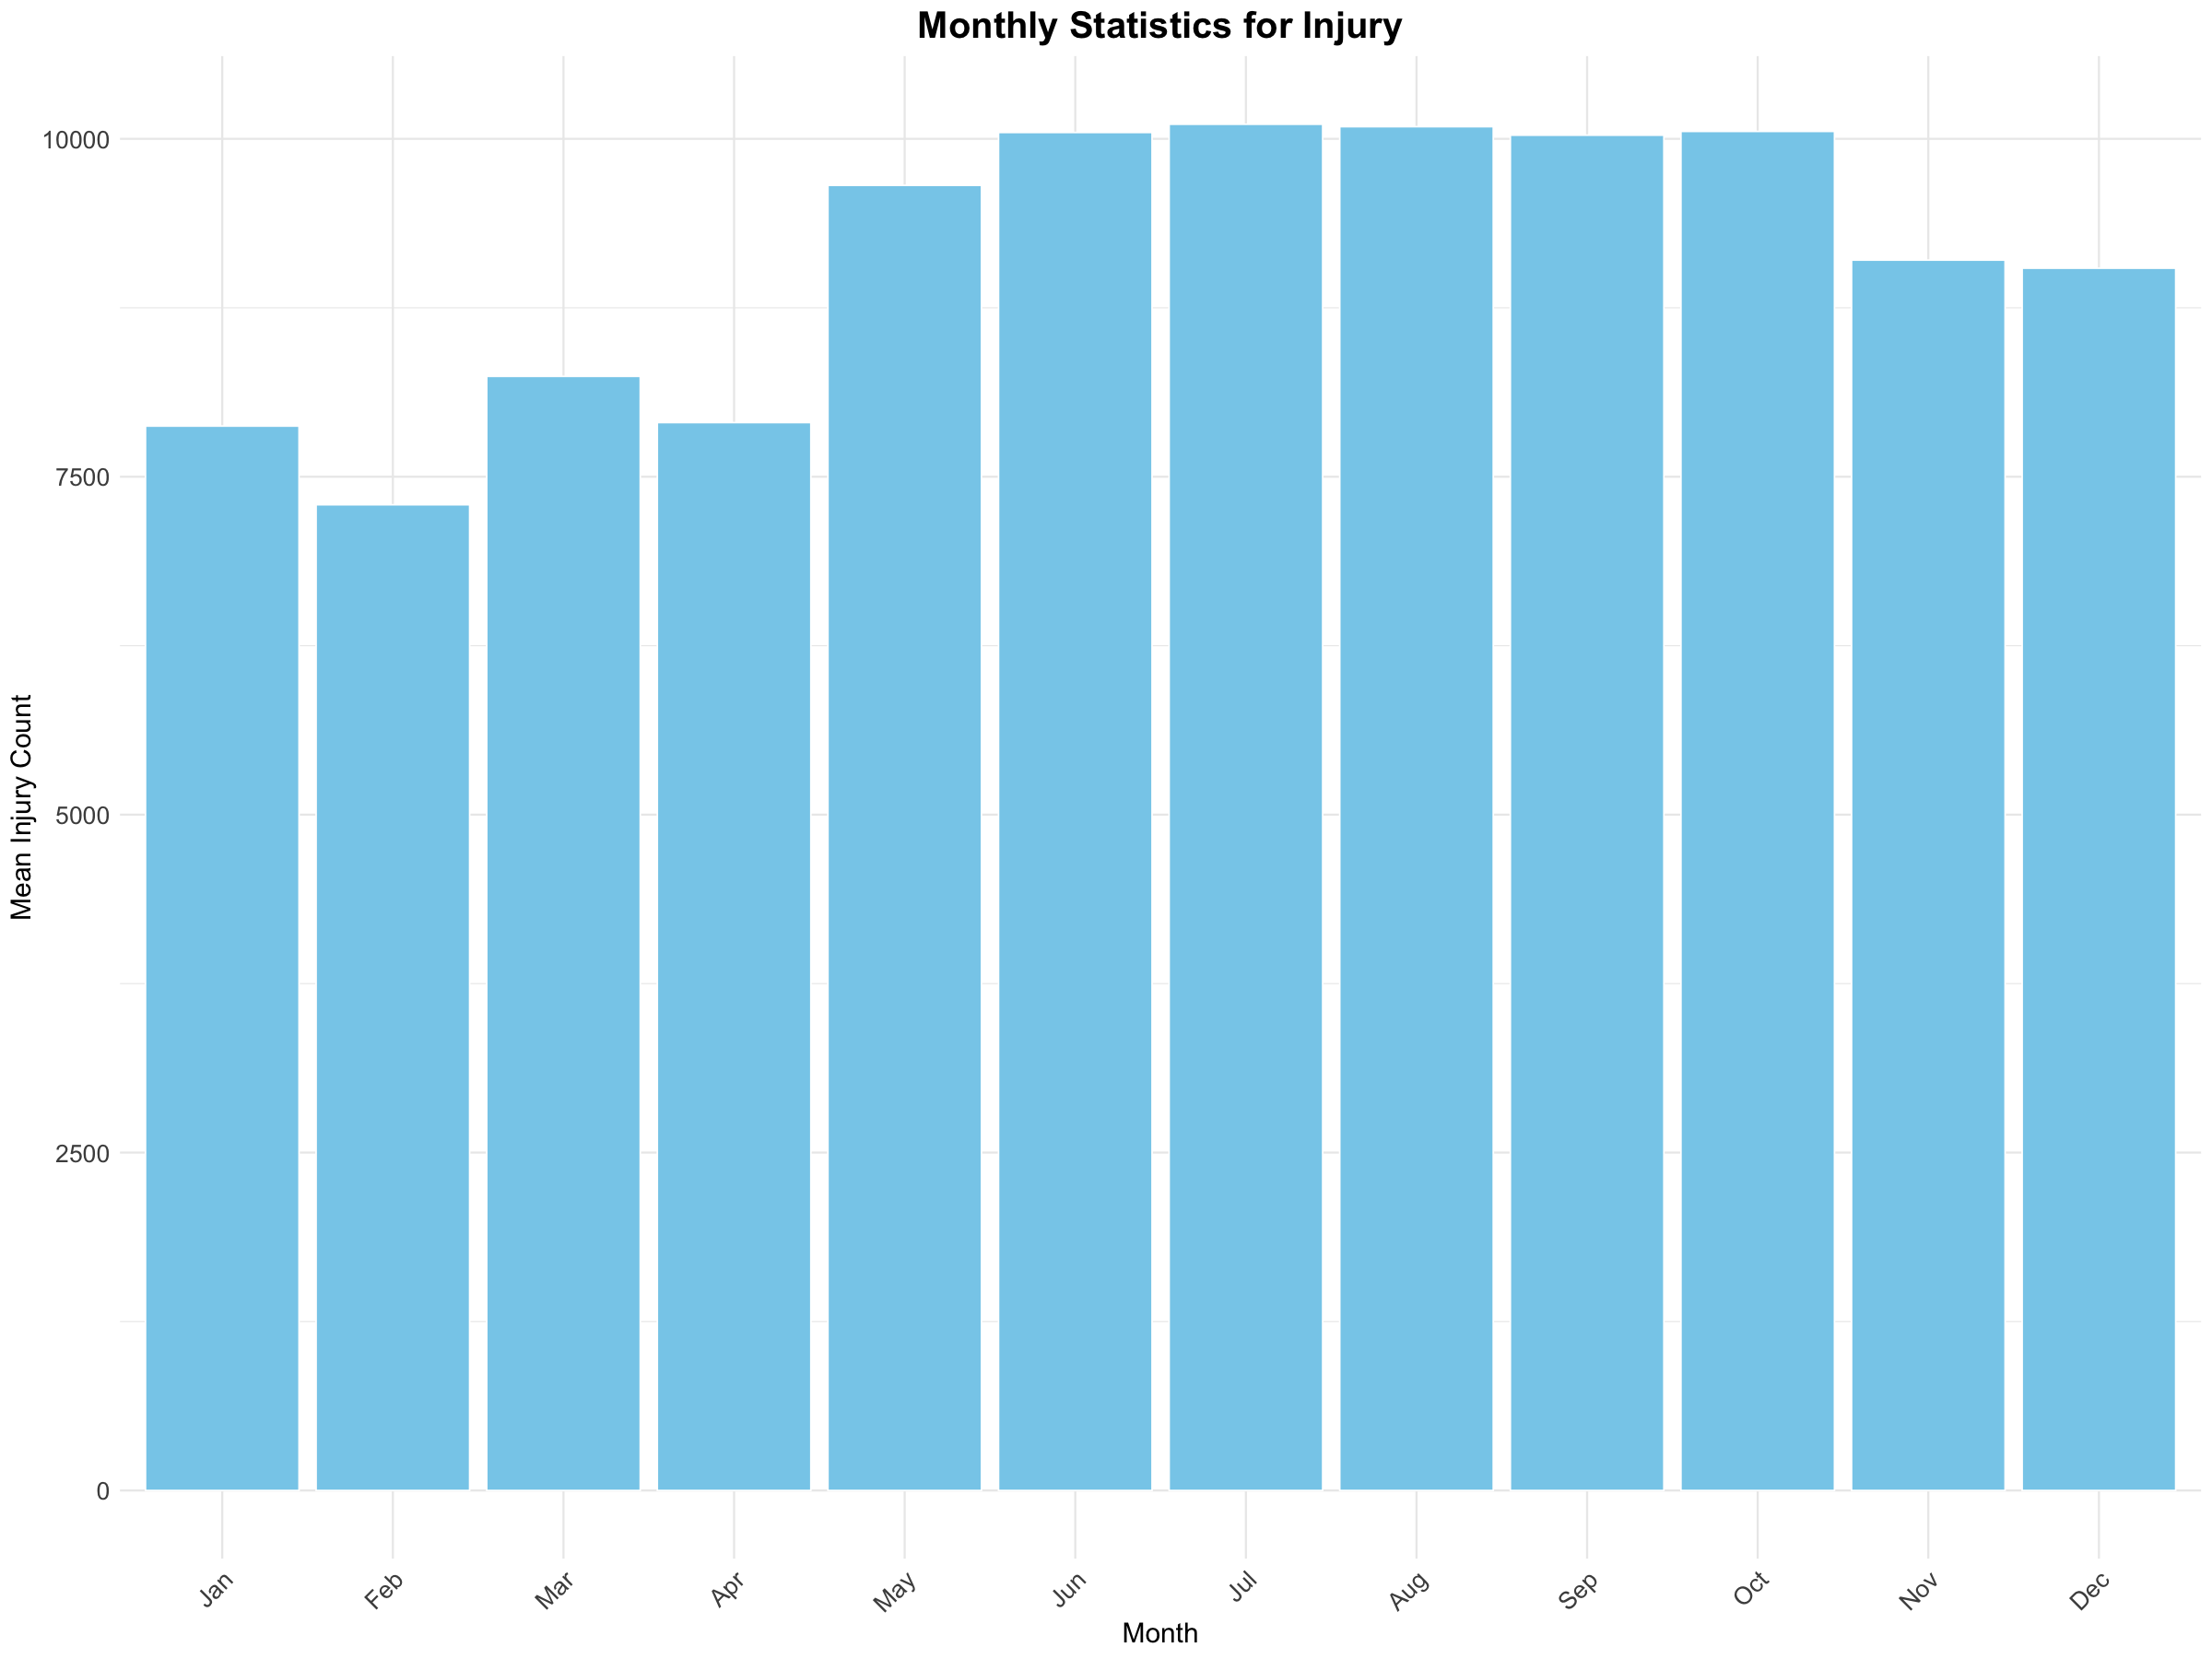

In [77]:
ggplot(monthlY_stats_df_Injury, aes(x = month, y = Mean)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "white") +
  labs(title = "Monthly Statistics for Injury",
       x = "Month",
       y = "Mean Injury Count") +
  theme_minimal(base_size = 14) + 
theme(plot.title = element_text(face = "bold", size = 24, hjust = 0.5),
     axis.title.x = element_text(size = 18),  # Larger x-axis title
        axis.title.y = element_text(size = 18),  # Larger y-axis title
        axis.text.x = element_text(angle = 45, hjust = 1, size = 16),  
        axis.text.y = element_text(size = 16))
